In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 12, # fontsize for x and y labels (was 10)
              'axes.titlesize': 12,
              'text.fontsize': 12, # was 10
              'legend.fontsize': 12, # was 10
              'xtick.labelsize': 12,
              'ytick.labelsize': 12,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

SPINE_COLOR = 'gray'

In [28]:
config = {
    "inputData": "/path/to/input/data/*",
    "outDir": "/home/jvdzwaan/data/dilipad/results/all_years-adj-cabinets_selected-parties/{}",
    "nTopics": 100
}

data = pd.read_csv(config.get('outDir').format('topics_100_data.csv'), index_col=0, encoding='utf-8')
print data.columns

Index([u'words', u'usefulness_A', u'usefulness_B', u'usefulness_C', u'cap',
       u'C_A', u'C_P', u'C_V', u'NPMI', u'UCI', u'UMass', u'mean_usefulness',
       u'usefulness', u'cap_svm'],
      dtype='object')


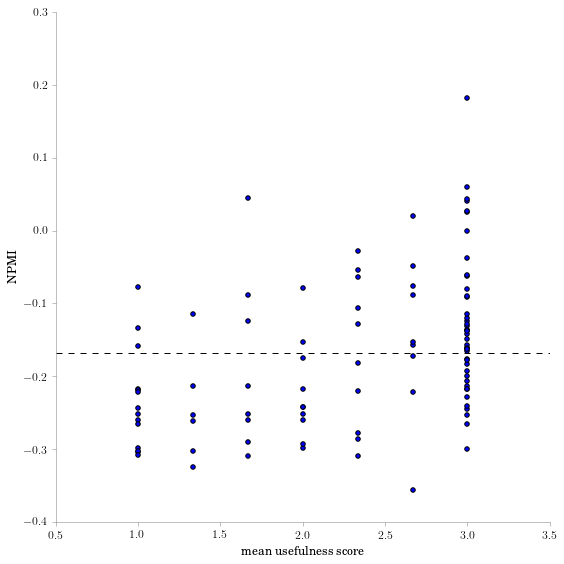

In [19]:
fig, ax = plt.subplots()
data['mean usefulness score'] = data['mean_usefulness']
data.plot('mean usefulness score', 'NPMI', kind='scatter', ax=ax)
plt.axhline(y=data['NPMI'].mean(), linestyle='--', color='black')
latexify(5, 5)
format_axes(ax)
plt.tight_layout()
plt.savefig("/home/jvdzwaan/Dropbox/Publications/Papers/Dilipad/latex/images/npmi_usefulness.pdf")

In [38]:
# hoge usefulnes rating, lage npmi
pd.options.display.max_colwidth = 115
hq = data[data['mean_usefulness']>2]
hq2 = hq[hq['NPMI'] < data['NPMI'].mean()]
print hq2.shape
hq2['words']

(23, 14)


1                                   risico systeem effect voordeel prikkel nadeel invoering idee onzekerheid systematiek
2                         argument bezwaar redenering argumentatie grond aard overweging omstandigheid oordeel standpunt
5                   ondersteuning aanbesteding hulp dienst budget kwaliteit mantelzorger handreiking opdracht mantelzorg
7           ziekenhuis verzekeraar zorgverzekeraar premie verzekering gezondheidszorg patiënt stelsel kwaliteit huisarts
11    indiener initiatiefnemer initiatief initiatiefwetsvoorstel doel initiatiefvoorstel inbreng woordvoerder handeli...
22                 baan arbeidsmarkt economie werkgelegenheid werkloosheid hervorming ontslagrecht zekerheid crisis kans
23                            gezin budget kinderbijslag arbeid verlof partner financiering keuze samenleving zorgverlof
26                                   dier verbod dierenwelzijn sector vlees slacht welzijn kip volksgezondheid dierproef
33              asielzoeker vree

In [39]:
# hoge usefulness rating, hoge npmi
hq = data[data['mean_usefulness']>2]
hq2 = hq[hq['NPMI'] > data['NPMI'].mean()]
print hq2.shape
hq2['words']

(39, 14)


0                      draagvlak herindeling stad inwoner samenwerking provincie bevolking bestuur argument samenvoeging
4                          auto weg verkeer kilometerheffing waterstaat file mobiliteit km infrastructuur luchtkwaliteit
10                         referendum verkiezing meerderheid democratie grondwet bevolking kiezer parlement stem uitslag
13                         toezicht kwaliteit inspectie taak instelling toezichthouder controle eis oordeel beleidsregel
17                                      internet bericht website actie gebruik communicatie beeld nummer e-mail telefoon
19                         markt consument marktwerking prijs concurrentie sector aanbieder tarief liberalisering dienst
20                               woning huurder corporatie wijk verhuurder huur huurwoning stad woningcorporatie bewoner
21                                         leven ziekte arts protocol gezondheid euthanasie vervanging hulp abortus dood
24                              

In [40]:
# lage usefulness rating, lage npmi
hq = data[data['mean_usefulness']<=2]
hq2 = hq[hq['NPMI'] < data['NPMI'].mean()]
print hq2.shape
hq2['words']

(29, 14)


3          besluit oordeel notitie procedure beslissing besluitvorming standpunt voorbereiding inhoud zorgvuldigheid
8                     bewindsman aanpak uitvoering resultaat inzet rapportage inzicht verbetering beeld samenwerking
9                                     regel regelgeving fraude schip bureaucratie wetgeving controle kop oorzaak wal
12     begroting visie cultuur terrein departement kennis ministerie bewindspersoon prioriteit begrotingsbehandeling
14                                      aanbeveling les oordeel fout mandaat kennis kritiek politiek analyse enquête
16                      toezegging evaluatie beantwoording gebruik winkel experiment effect dank behoefte verruiming
18       sgp-fractie nationaliteit uitzondering categorie eis plicht hout nederlanderschap uitgangspunt verplichting
28    gesprek duidelijkheid helderheid tafel onduidelijkheid kwestie uitkomst beantwoording wetgevingsoverleg onrust
31                                verklaring twijfel getuige bew

In [41]:
# lage usefulness rating, hoge npmi
hq = data[data['mean_usefulness']<=2]
hq2 = hq[hq['NPMI'] > data['NPMI'].mean()]
print hq2.shape
hq2['words']

(9, 14)


6                       grens buitenland verkeer principe lijn verschil idee verleden constructie omstandigheid
15    bevoegdheid burgemeester college klacht ombudsman taak instituut gemeenteraad verordening kinderombudsman
41                          element relatie aspect benadering term karakter verhouding maat perspectief opzicht
45                       ministerie ambtenaar departement justitie tb medewerker hoogte dienst incident dossier
47            organisatie doel lijst doelstelling taak verantwoording activiteit controle jaarverslag resultaat
52                                 samenleving waard politiek thema leven staat opvatting eeuw politicus gedrag
53                                        verhaal mijnheer idee betoog paar wereld huis hart hoop werkelijkheid
62         begrip definitie grond onderscheid interpretatie term wetgeving minderheid discriminatie formulering
63                                     vrouw man partner slachtoffer relatie moeder huwelijk vader perso